## Practice with Pandas + Sklearn: Features and How-Tos

#### Will Cover the following topics:
1. Basic Data Cleaning
2. Helpful Pandas data transformation tools
3. Sklearn preprocessing toolkits
4. Sklearn different models
5. Basic Metric evaluations

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### How much does a house cost?
![](http://www.hubbellhomes.com/images/community/368/tb/Pemberley-Hills-thumbNEW.jpg)

## Beginners Tips

<img src='http://www.allwebdesigninfo.com/wp-content/uploads/2014/03/Beginner-Programming-Mistakes.jpg'  width='400px' />
- **Keywords** For long analysis, becareful how you name your variables. With really complicated notebooks, a simple rewrite can ruin the rest of your programming setup. especially becareful of these keywords:

` X, y, n, df, data, dataframe, train, test, results, final_results, predict` 

- **Self-Assignment** As you are going on becare of reusing names and looping coding blocks, not how you divide your code blocks. A standalone block where you do a self-assignment, or a variable name is reused, can lead to a recursive like effects.

```python
# this is fine because the data is reloaded each time this block is run
mydf = load_data()
mydf = replace_any_zeroes(df)
```

```python
# this is dangerous. if you keep re-running this block, it will 
# continously append new columns over and over with no end
mydf = mydf.left_join(new_dataset)
```

- **Common Datascience vocab; choose other words as vars** Just know up front that you will most likely be using `X`, `y`, `model`, `train`, `test`, `pred`, and result keywords. Becareful of using these variables elsewhere in coding loops etc.

```python
# currently y is a matrices
y,X = train_test_split(mydf)

## if you start 
for y in list_of_columns:
    print('column named' + y)

## what is in 'y' now?
model.fit(X,y)
```

- **Pandas Warning on DataFrame copying** Pandas dataframes as they get manipulated for a majority of the time are still referencing the same memory or dataframe:

```python

# IS STILL POINTING TO ORIGINAL, EDITS TO NEW WILL ALSO BE APPLIED TO ORIGINAL
new_df = df 

# makes a new copy

new_df = df.copy()
```



## 1. Load Your Data 

<img src='https://ak8.picdn.net/shutterstock/videos/17983978/thumb/7.jpg' style='width:300px'/>

In [150]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

#prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from IPython.display import display
from sklearn import metrics


%matplotlib inline

## 2. Navigating your data

<img src='https://www.eurisy.org/data_files/mce_images/Blog_images/Human_hand_with_a_laptop_surrounded_by_iconsellagrin.jpg' style='width:400px' />
#### Dataset size

- **Train**: 1460
- **Test**: 1458

#### read in CSV's from a file path

In [2]:
train_df = pd.read_csv('./train (1).csv')
df_test = pd.read_csv('./test (1).csv')

#### whats the size

In [3]:
train_df.shape

(1460, 81)

#### whats the description?

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Filtering and Peering inside

<img src='http://www.blastam.com/wp-content/uploads/ecommerce-filter-feature.jpg' />

#### take a peek at the first few rows,  note what may be categorical , what may be numeric

In [6]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


### When is it an array? When is it a Dataframe?, note the difference `[ ]` vs `[[ ]]`

In [7]:
train_df['SalePrice'].head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
train_df[['SalePrice']].head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### Filtering 

In [9]:
train_df['SalePrice'].head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

In [10]:
train_df[['SalePrice','LotShape']].head(4)

,SalePrice,LotShape
0,208500,Reg
1,181500,Reg
2,223500,IR1
3,140000,IR1


In [11]:
train_df.iloc[range(3),]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [12]:
train_df[train_df['SalePrice']>200000].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train_df[train_df['LotShape'].isin(['Reg','IR1'])].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### Take a look at the column names of all the fields

In [14]:
print('this many columns:%d ' % len(train_df.columns))
train_df.columns

this many columns:81 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Changing the Column names starting with numbers 

In [15]:
train_df.columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirsstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

## 3. Clean your Data
<img src='https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAALAAAAAJGU3YjAwY2I5LTg1ODMtNDg5Ny04MTg2LTNhMWUwYTdkZDk2Zg.png'  width='300px'/>

### Check for Blanks or NA's!

Note that there is a difference between **`NaN`, `''`, `None`** so be aware when looking at your data

#### check for NA's in a column

In [16]:
train_df[train_df['Alley'].isna()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Fill in NA's

<img src='http://csharpcorner.mindcrackerinc.netdna-cdn.com/UploadFile/219d4d/different-ways-to-replace-null-in-sql-server/Images/records.jpg'/>

The `fillna` function is much handier to fill in NA's that trying to the boolean. If needed you can do a comparison with `numpy.NaN` or in our case `==np.nan`, `np.isnan(some number )`

In [17]:
train_df['Alley'].fillna(0, inplace=True)

#### check the whole array

In [18]:
na_totals = train_df.isna().sum().sort_values(ascending=False)
na_totals[na_totals>0]

PoolQC          1453
MiscFeature     1406
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Fill in NA's for all 

In [19]:
train_df.fillna(0, inplace=True)

### Assign numerical features

Identified square area as numeric. Identified any field that had that aspect to them

In [21]:
numeric_cols = [x for x in train_df.columns if ('Area' in x) | ('SF' in x)] + ['SalePrice','LotFrontage','MiscVal','EnclosedPorch','ThreeSsnPorch','ScreenPorch','OverallQual','OverallCond','YearBuilt']

for col in numeric_cols:
    train_df[col] = train_df[col].astype(float)
numeric_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'FirsstFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'LotFrontage',
 'MiscVal',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'OverallQual',
 'OverallCond',
 'YearBuilt']

### Turn the rest into categorical

In [22]:
categorical_cols = [x for x in train_df.columns if x not in numeric_cols]

for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')

### Double check the headings:

In [23]:
#train_df.info()

## 4. Feature engineering

<img src='https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAiuAAAAJGRkNGQzNjU5LTQzOTAtNDRlZC05NTZkLTcxZWM5YmYwZmRkNA.png' style='width:300px'>

### Pandas: How to transform a column / apply a function against it
In this case we will be looking at Log sale price. Here's how to transform a column. Both ways are valid, but the 2nd method only works because `np.log` was designed for handling vectors. If you tried 

`df['full name'] = df['first name'] + df['last name']` it will not work with this approach because there is no + operator that concats two vectors elementwise.

#### Create calculated fields (2 ways outlined below)

In [24]:
train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x : np.log(x)) 

In [25]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

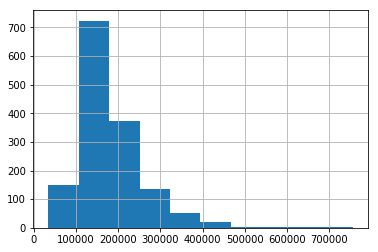

In [26]:
train_df['SalePrice'].hist()

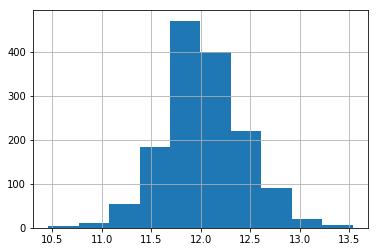

In [27]:
train_df['LogSalePrice'].hist()

#### What if you wanted to make a categorical? (2 ways)

In [28]:
train_df['above_200k'] = train_df['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
train_df['above_200k'] = train_df['above_200k'].astype('category')

In [29]:
train_df.loc[train_df['SalePrice']>200000,'above_200k'] = 1
train_df.loc[train_df['SalePrice']<=200000,'above_200k'] = 0
train_df['above_200k'] = train_df['above_200k'].astype('category')

### Pandas: how to add columns together (numeric)

In [30]:
train_df['LivArea_Total'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['PoolArea']
train_df[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()

,LivArea_Total,GrLivArea,GarageArea,PoolArea
0,2258.0,1710.0,548.0,0.0
1,1722.0,1262.0,460.0,0.0
2,2394.0,1786.0,608.0,0.0
3,2359.0,1717.0,642.0,0.0
4,3034.0,2198.0,836.0,0.0


### Pandas: how to apply a function rowwise (example is adding strings)

- `axis=0` - pass a **column** of data
- `axis=1` - pass a **row** of data

In [31]:
train_df['Lot_desc'] = train_df.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
train_df[['Lot_desc','MSZoning','LotShape']].head()

,Lot_desc,MSZoning,LotShape
0,RLReg,RL,Reg
1,RLReg,RL,Reg
2,RLIR1,RL,IR1
3,RLIR1,RL,IR1
4,RLIR1,RL,IR1


### Sklearn: How to scale fields

<img src='http://images.slideplayer.com/38/10783489/slides/slide_36.jpg' style='width:500px'/>

- `StandardScaler` - subtract the mean and divide by std
- `MaxAbsScaler` - transform down to [-1, 1] bounds
- `QuantileTransformer` - transform down to [0 1] bounds

In [32]:
train_df['LotArea_norm'] = train_df['LotArea']

ss = StandardScaler()
mas = MaxAbsScaler()
qs = QuantileTransformer()
train_df['LotArea_norm'] = ss.fit_transform(train_df[['LotArea']])
train_df['LotArea_mas'] = mas.fit_transform(train_df[['LotArea']])
train_df['LotArea_qs'] = qs.fit_transform(train_df[['LotArea']])


train_df[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

,LotArea_norm,LotArea_mas,LotArea_qs,LotArea
0,-0.207142,0.039258,0.349349,8450.0
1,-0.091886,0.044600,0.525025,9600.0
2,0.073480,0.052266,0.720220,11250.0
3,-0.096897,0.044368,0.509667,9550.0
4,0.375148,0.066250,0.897123,14260.0


### Sklearn: 1 hot encoding and Label Encoding

<img src='https://cdn-images-1.medium.com/max/1600/1*ZsYkXEa1qrKeGiplNnFHyQ.jpeg' width='500px' />

### Sklearn: 1 hot encoding 
We know that MSSubclass is a categorical, lets turn it into 1 hot encoding. Note if you pass your entire dataframe, it will convert all if it AUTOMATICALLY. 

#### If you want to do this piece meal, isolate the single target categorical column, transform it and join it back together

In [33]:
small_df = train_df[['MSZoning','SalePrice']].copy()
small_df['MSZoning'] = small_df['MSZoning'].astype('category')
small_df.head()


,MSZoning,SalePrice
0,RL,208500.0
1,RL,181500.0
2,RL,223500.0
3,RL,140000.0
4,RL,250000.0


In [34]:
pd.get_dummies(small_df).head(5)

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,208500.0,0,0,0,1,0
1,181500.0,0,0,0,1,0
2,223500.0,0,0,0,1,0
3,140000.0,0,0,0,1,0
4,250000.0,0,0,0,1,0


### Sklearn: Label Encoding


In [35]:
small_df = train_df[['MSSubClass','SalePrice']].copy()
small_df['MSSubClass'] = small_df['MSSubClass'].astype('category')
small_df.head()


,MSSubClass,SalePrice
0,60,208500.0
1,20,181500.0
2,60,223500.0
3,70,140000.0
4,60,250000.0


In [36]:
le = LabelEncoder()
trf_MSSubClass = le.fit_transform(small_df['MSSubClass'])
trf_MSSubClass

array([5, 0, 5, ..., 6, 0, 0])

In [37]:
le.classes_

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190])

In [38]:
le.inverse_transform(trf_MSSubClass)

array([60, 20, 60, ..., 70, 20, 20])

## Model Prep! making y = X , 2 methods

<img src='http://okfnlabs.org/img/posts/olap-slice_and_dice-overview.png' style='width:400px' />

In [73]:
feature_cols = [col for col in train_df.columns if 'Price' not in col]

#### Method 1 manually

In [83]:
y = train_df['LogSalePrice']
X = train_df[feature_cols]
print(y.head(2),'\n\n', X.head(2))

0    12.247694
1    12.109011
Name: LogSalePrice, dtype: float64 

   Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0   8450.0   Pave     0      Reg   
1  2         20       RL         80.0   9600.0   Pave     0      Reg   

  LandContour Utilities     ...     MoSold YrSold SaleType SaleCondition  \
0         Lvl    AllPub     ...          2   2008       WD        Normal   
1         Lvl    AllPub     ...          5   2007       WD        Normal   

  above_200k LivArea_Total Lot_desc  LotArea_norm  LotArea_mas  LotArea_qs  
0          1        2258.0    RLReg     -0.207142     0.039258    0.349349  
1          0        1722.0    RLReg     -0.091886     0.044600    0.525025  

[2 rows x 86 columns]


#### Method 1b: Quick and Dirty way to get 100% numerical matrix

In [84]:
X_numerical = pd.get_dummies(X)
X_numerical.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Lot_desc_RHIR2,Lot_desc_RHReg,Lot_desc_RLIR1,Lot_desc_RLIR2,Lot_desc_RLIR3,Lot_desc_RLReg,Lot_desc_RMIR1,Lot_desc_RMIR2,Lot_desc_RMIR3,Lot_desc_RMReg
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,0,0,0,0,0,0
3,60.0,9550.0,7.0,5.0,1915.0,0.0,216.0,0.0,540.0,756.0,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,0,0,0,0,0,0


#### With Patsy

https://patsy.readthedocs.io/en/latest/formulas.html

In [85]:
import patsy
formula = 'LogSalePrice ~ %s' % (' + '.join(feature_cols)) 
y, X = patsy.dmatrices(formula, train_df, return_type='dataframe')
print(y.head(2),'\n\n', X.head(2))

   LogSalePrice
0     12.247694
1     12.109011 

    Intercept  Id[T.2]  Id[T.3]  Id[T.4]  Id[T.5]  Id[T.6]  Id[T.7]  Id[T.8]  \
0        1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Id[T.9]  Id[T.10]     ...      OpenPorchSF  EnclosedPorch  ThreeSsnPorch  \
0      0.0       0.0     ...             61.0            0.0            0.0   
1      0.0       0.0     ...              0.0            0.0            0.0   

   ScreenPorch  PoolArea  MiscVal  LivArea_Total  LotArea_norm  LotArea_mas  \
0          0.0       0.0      0.0         2258.0     -0.207142     0.039258   
1          0.0       0.0      0.0         1722.0     -0.091886     0.044600   

   LotArea_qs  
0    0.349349  
1    0.525025  

[2 rows x 1951 columns]


#### Note with out fast.ai train test split, patsy is great to make a numerical matrix

### Train Test Split

<img src='https://cdn-images-1.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png' width='400px'/>
#### Method 1 - manually

In [86]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 170
n_trn = len(y)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(1290, 1951) (170, 1951) (1290, 1) (170, 1)


#### Method 2 - train_test split


In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(1168, 1951) (292, 1951) (1168, 1) (292, 1)


## Modeling

<img src='https://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg' style='width:400px' />
### Fitting a Linear Model

In [88]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
lm.score(X_train,y_train)

1.0

In [90]:
lm.score(X_valid,y_valid)

0.8926791758475684

In [92]:
y_pred = lm.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.13557600858382415

### Fitting a regularized Model (with k Folds)

In [98]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [99]:
rdgCV.alpha_

10

In [101]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_valid, y_valid)

0.91738970120679553

In [102]:
y_pred = rdg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.11894821820610976

### Fitting a RandomForest Regressor


#### Parameters:
**`df`**: The data frame you wish to process.

**`y_fld`**: The name of the response variable

**`skip_flds`**: A list of fields that dropped from df.
**`do_scale`**: Standardizes each column in df.

**`na_dict`**: a dictionary of na columns to add. Na columns are also added if there
    are any missing values.

**`preproc_fn`**: A function that gets applied to df.
**`max_n_cat`**: The maximum number of categories to break into dummy values, instead
    of integer codes.

subset: Takes a random subset of size subset from df.

#### Returns:
**`[x, y, nas]`**:
    **`x`**: x is the transformed version of df. x will not have the response variable
        and is entirely numeric.

    **`y`**: y is the response variable

    nas: returns a dictionary of which nas it created, and the associated median.


In [103]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X,y)

/Users/tlee010/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
rfr.score(X_valid,y_valid)

0.98662586177542244

In [105]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.047860116133087299

### Fitting a Logistic Regression

#### Resplitting data for categorical prediction

In [142]:
import patsy

train_df['above_200k'] = train_df['above_200k'].astype(float)
formula = 'above_200k ~ %s' % (' + '.join(feature_cols)) 
y, X = patsy.dmatrices(formula, train_df, return_type='dataframe')
print(y.head(2),'\n\n', X.head(2))


X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)



   above_200k
0         1.0
1         0.0 

    Intercept  Id[T.2]  Id[T.3]  Id[T.4]  Id[T.5]  Id[T.6]  Id[T.7]  Id[T.8]  \
0        1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Id[T.9]  Id[T.10]     ...      EnclosedPorch  ThreeSsnPorch  ScreenPorch  \
0      0.0       0.0     ...                0.0            0.0          0.0   
1      0.0       0.0     ...                0.0            0.0          0.0   

   PoolArea  MiscVal  above_200k  LivArea_Total  LotArea_norm  LotArea_mas  \
0       0.0      0.0         1.0         2258.0     -0.207142     0.039258   
1       0.0      0.0         0.0         1722.0     -0.091886     0.044600   

   LotArea_qs  
0    0.349349  
1    0.525025  

[2 rows x 1951 columns]
(1168, 1951) (292, 1951) (1168, 1) (292, 1)


In [143]:
lgm = LogisticRegression()
lgm.fit(X_train,y_train)

/Users/tlee010/anaconda/envs/fastai/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
lgm.score(X_valid,y_valid)

1.0

In [146]:
y_pred = lgm.predict(X_valid)

In [147]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[201   0]
 [  0  91]]


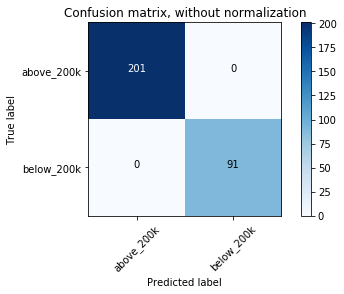

In [153]:
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['above_200k', 'below_200k'],
                      title='Confusion matrix, without normalization')